# Orientation matched filters response

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as image
import skimage.io as io
import seaborn as sns
import pandas as pd

In [44]:
def orientedGaussKernel(sigma=1.0,ratio=0.25, angle=0.0) :
    angle = np.pi*angle/180.0
    size = np.ceil(sigma * 3).astype(int)
    x,y  = np.meshgrid(np.linspace(-size,size,2*size+1),np.linspace(-size,size,2*size+1))
    xr    =   x*np.cos(angle) + y*np.sin(angle) 
    yr    = - x*np.sin(angle) + y*np.cos(angle) 
    
    k=np.exp(-((xr**2)/(2*sigma**2) + (yr**2)/(2*(ratio*sigma)**2)))
    k=k/k.sum()
    
    return k
    

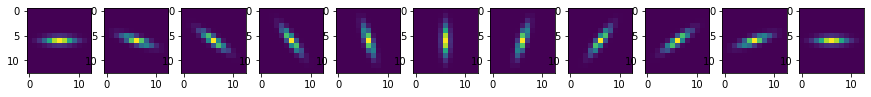

In [48]:
N=11
fig, axes = plt.subplots(1,N,figsize=(15,4)) 
for ax,angle in zip(axes,np.linspace(0,180,N)) :
    ax.imshow(orientedGaussKernel(sigma=2,ratio=0.25,angle=angle))
                    

In [50]:
def matchedFilterResponse(img,sigma=2,ratio=0.25, dirs=11) :
    angles = np.linspace(0,180-180/dirs,dirs)
    
    res=np.zeros(img.shape)
    for angle in angles :
        fimg=image.convolve(img,orientedGaussKernel(sigma=sigma,ratio=ratio,angle=angle))
        res=np.maximum(res,fimg)
        
    return res

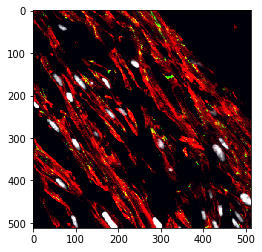

In [55]:
img = io.imread('cellimage.tif')
plt.imshow(img)

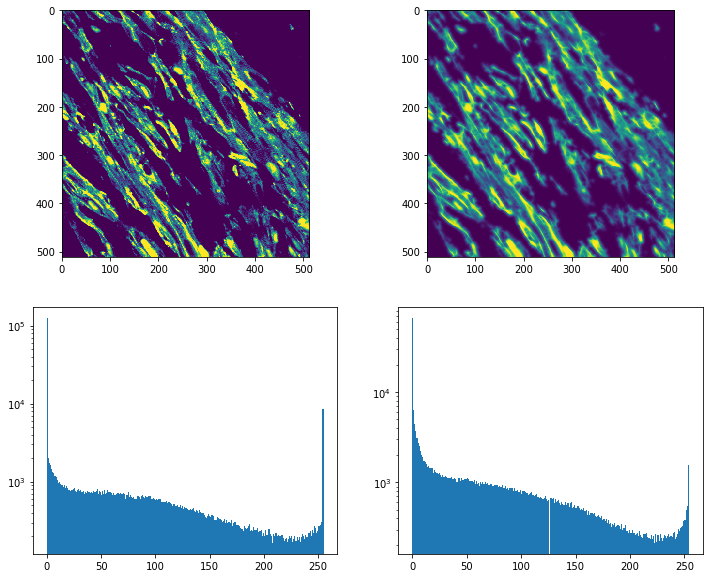

In [108]:
mfr = matchedFilterResponse(img[:,:,0],sigma=3,ratio=0.2, dirs=11)
fig, ((ax1,ax2),(ax3,ax4)) =plt.subplots(2,2,figsize=(12,10))
ax1.imshow(img[:,:,0])
ax2.imshow(mfr)
ax3.hist(img[:,:,0].ravel(),bins=256);
ax3.set_yscale('log')
ax4.hist(mfr.ravel(),bins=256);
ax4.set_yscale('log')